<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bellman-Ford

## 1. **Problema:** El camino más corto

El problema del camino más corto corresponde a encontrar el camino entre dos vértices o nodos en un grafo de tal forma que la suma de todas sus distancias es la mínima.

<center>

<img src="https://www.freecodecamp.org/news/content/images/2020/06/image-121.png">

</center>

#### ***Entrada***: *Grafo dirigido $G = (V,E)$, un vértice fuente $s \in V$ y un valor real $l_e$ asociado a cada arco $e \in E$* 

#### ***Salida***: *Una de las siguientes opciones:*
1. *Distancia más corta $dist(s,v)$ para cada vertice $v \in V$*
2. *Una declaración indicando que $G$ contiene un ciclo negativo*

Una de las aplicaciones de los algoritmos que resuelven este problema es en encontrar el camino más corto entre dos lugares físicos, donde cada nodo puede representar intersecciones entre calles y los arcos los caminos entre cada intersección. 

## 2. **Bellman-Ford**

### 2.1 ***Código***

#### *Funciones auxiliares*
1. Generados de instacias
2. Creacion de nxdigraph
3. Graficar nxdigraph

In [57]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [56]:
def instance_generator2(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [67]:
import networkx as nx

def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [59]:
# Recibe un grafo representado una una lista de tuplas y un nodo de origen. Grafica este grafo

def show_graph(graph, origin):

    # Definir tamaño de la figura
    plt.figure(3,figsize=(11,11))

    # Colores
    color_map = []
    for node in G:
        if node == origin : color_map.append("red")
        else : color_map.append('blue')

    # Definir posicion paa nodos
    pos=graphviz_layout(G, prog="dot")

    # Mostrar etiquetas 
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels = labels, font_size=12)

    # Mostrar nodos
    nx.draw(G,pos, with_labels=True, node_color=color_map, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

    plt.show()

    return

*Implementación para algoritmo de Dijkstra con cola de prioridad*

In [73]:
# Desde pseudocogigo en : https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-using-priority_queue-stl/

from queue import PriorityQueue

def dijkstra_algorithm(graph, s, n):

    dist = [1000000000] * n
    dist[s] = 0

    pq = PriorityQueue()
    pq.put((0,s))

    while pq.empty() == False :
        u = pq.get()
        for v in graph.successors(u[1]) :
            if dist[v] > u[0] + graph[u[1]][v]['weight'] :
                dist[v] = u[0] + graph[u[1]][v]['weight']
                pq.put((dist[v], v))
    
    return dist

# Ejemplo
T = graph_to_nxdigraph([(0,1,4), (0,4,2), (1,2,4), (4,1,-1), (4,3,2), (3,2,2)], 5)

lista = dijkstra_algorithm(T, 0, 5)
lista

[0, 1, 5, 4, 2]

*Implementación del algoritmo Bellman-Ford*

In [83]:
# Recibe el grafo como nxdigraph, el nodo s de de partida y la cantidad de nodos

def bellman_ford(graph, s, n, visualize = False, verbose = False):

    if visualize == True :
        print("Grafo a trabajar : ")
        show_graph(graph, s)

    if verbose == True :
        print(f"El vertice de origen es : {s}")
        print(f"Calculando caminos mas cortos ...")

    # Tabla de subproblemas
    A = [[0 for _ in range(n + 1)] for _ in range(n + 1)]
    
    # Caso base
    A[0][s] = 0

    for v in graph:
        if v != s:
            print(v)
            A[0][v] = +1000000000

    if verbose == True :
        print(f"\nValores base inicializados : {[A[0][v] for v in graph]}\n")
        print(f"--------------------------------------------------------------------------------")
    
    # Resolver subproblemas
    for i in range(1,n + 1):

        if verbose == True :
            print(f"-----Resolviendo problemas de tamaño {i}, con {i} arcos disponibles-----")

        stable = True

        for v in graph:
            case_1 = A[i-1][v]

            # Calculo segundo caso
            mini = 1000000000
            w_final = -1
            ws = graph.predecessors(v)

            for w in ws:
                edge = graph[w][v]['weight']
                dist = A[i-1][w] + edge

                if dist < mini : 
                    mini = dist
                    w_final = w
            
            case_2 = mini

            A[i][v] = min( case_1, case_2)

            if verbose == True :
                print(f"---> Reolviendo para problemas de {i} arcos y con vertice {v} de llegada")

                print(f"\nValor para caso 1, {i-1} arcos para llegar al vertice {v} : {case_1}" )
                print(f"Valor para caso 2, {i} arcos para llegar al vertice {v} y con w = {w_final}: {case_2}\n" )

                if case_1 < case_2 :
                    print(f"El primer caso es el camino optimo y el resultado para el problema de tamaño i = {i} y v = {v}\n")
                else :
                    print(f"El segundo caso es el camino optimo y el resultado para el problema de tamaño i = {i} y v = {v}\n")

            if A[i][v] != A[i-1][v] :

                if verbose == True :
                    print(f"Las soluciones a los subproblemas no se han estabilizado")
                stable = False
            
            if verbose == True :
                print(f"--------------------------------------------------------------------------------")
            
        if stable :
            if verbose == True :
                print(f"--------------------------------------------------------------------------------")
                print(f"Las soluciones a los subproblemas se han estabilizado para i = {i}")
                print(f"Resultados : { [A[i-1][v] for v in graph]}")
            return [A[i-1][v] for v in graph]
    
    if verbose == True :
        print(f"Los resultados a los subproblemas no se han estabilizado, se ha encontrado un ciclo negativo")
    return "ciclo negativo"

Grafo a trabajar : 


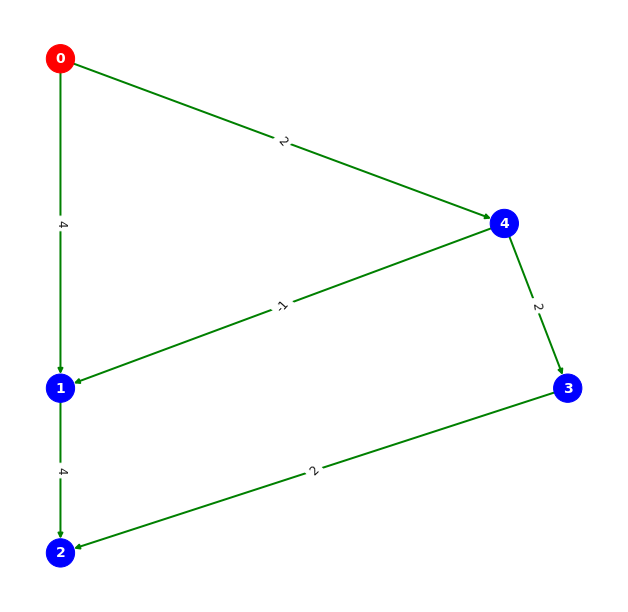

La lista de distancias mas cortas es :  [0, 1, 5, 4, 2]


In [81]:
# Ejemplo
G = graph_to_nxdigraph([(0,1,4), (0,4,2), (1,2,4), (4,1,-1), (4,3,2), (3,2,2)], 5)

lista = bellman_ford(G, 0, 9, visualize = True)
print("La lista de distancias mas cortas es : ", lista)

### 2.2 ***Descripción del algoritmo***

El algoritmo *Bellman-Ford* resuelve el problema utilizando programación dinámica. Esto significa que a partir del problema se pueden identificar los siguientes elementos : 
* *Subestructuta óptima*
* *Definición recursiva*
* Construcción de la solución <br><br>


#### **Subestructura óptima**

Es importante definir la solución del problema a partir de la solución de subproblemas de menor tamaño, dada la existencia de superposición en las soluciones.

Hay que tener en cuenta que un *camino más corto* entre dos vertices está compuesto por caminos más cortos internos. Esto es fácil de comprobar dado a que si existiese un camino aún más corto entre algún par de vértices contenidos en el original, se rompería la supuesta optimidad de la declaración original. *(Reemplazar entregaría un camino aún más corto)*

Para poder hablar de subproblemas menores debemos primero definir en qué consiste el tamaño de un problema. En esta ocasión, se determina el tamaño según la cantidad de arcos $i$ considerados en un camino. Este límite $i$ ayudará a evitar ciclos infinitos detro de la solución al problema, puesto a que independiente de cuántas vueltas se de un supuesto camino, se agotará la cantidad de arcos disponibles.

Un camino más corto entre dos vértices tiene a lo más $n - 1$ arcos, siendo $n$ la cantidad de vértices alcanzables desde el nodo de origen. Esta observación nos ayudará a determinar un límite para la cantidad de arcos a revisar a ala hora de resolver los subroblemas de tamaño $i$

Coonsiderando un grafo $G = (V, E)$, con $|V|$ vértices y $|E|$ arcos, junto a un vértice origen $s \in V$ y un límite de arcos $i \in [1,2...]$. Consideremos que $P$ es un camino de $s$ a un vértice $v$ de a lo más $i$ arcos. Si $P$ es, además, el camino óptimo entre $s$ y $v$, tenemos :

**Caso 1** <br>
> $P$ tiene $i - 1$ o menos arcos
>> $P$ es la solución al subproblema de menor tamaño $i = i -1$ (que aún tiene destino en $v$). Si existiese un camino más corto se contradice la optimidad de $P$.

**Caso 2** <br>
> $P$ tiene $i$ arcos
> <center>
> <img src="https://i.imgur.com/A5fChNa.png">
> </center>
>
>> En este caso, la solución $P$ está conformada por la solución óptima para un problema $P'$ de a lo maś $i-1$ arcos de $s$ a $w$. El largo $L'$ de este problema debe ser menor al largo $L$ de $P$ y $L = L' + l_{w,v}$, siendo el arco $(w,v)$ aquel último que conecta a $P'$ con el destino $v$

Esta descomposición del problema ayudará a encontrar una solución dinámica <br> <br>

#### **Función recursiva**

A continuación, se define una función recursiva que permita calcular todos los subproblemas a partir de la subestructura definida anteriormente

Sea $L_{i,v}$ el tamaño mínimo de un camino entre $(s,v)$ con a lo más $i$ arcos :

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(caso 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(caso 2)}
    	\end{array}
\right\}$

Además tenemos los casos base cuando $i = 0$

$L_{0,v} =
\left\{
\begin{array}{cc}
0 & \text{si $$s=v$$} \\
+\infty & \text{en otro caso.}
\end{array}
\right.$

Si $L_{i-1, v}$ y los $L_{i-1,w}$ relevantes para el cálculo de $L_{i,v}$ son $+∞$, entonces $v$ no se puede alcanzar con $i$ o menos arcos, por lo que $L_{i,v} = +∞$ <br><br>

#### **Como delimitar el valor de $i$**

Para determinar un valor límite para las iteraciones $i$ se observa que luego de una cierta cantidad de iteraciones, los resultados obtenidos como el camino mínimo se estabilizan, es decir, empiezan a presentar el mismo valor consecutivamente *(Puesto a que podemos seguir agregando arcos al límite incluso si los caminos más cortos han sido correctamente calculados)*

El algoritmo se estabiliza cuando :

<center>

$L_{k+1,v} = L_{k,v}$

</center>

Esto implica que $L_{i,v} = L_{l,v}$ para cualquier iteración superior de $i$.

Además, se observa que dado un grafo $G = (V,E)$, el camino mínimo de $s → v$ tendrá a lo más $n -1$ arcos, siendo $n$ la cantidad de vértices en el grafo. Un camino de $n-1$ arcos visita todos los vértices al menos una vez. Cualquier valor mayor que este requiere re-visitar algún vértice, lo cuál no sería óptimo.

Por lo tanto, basta con que $i$ alcance el valor de $n$ para resolver correctamente el problema, puesto a que es la cantidad máxima de arcos para cualquier camino. Se verifica estabilidad con la siguiente expresión :

<center>

$L_{n,v} = L_{n-1,v}$

</center>

Esta estabilización solo es posible cuando el grafo de entrada no presenta un ciclo negativo. Si el algoritmo no detecta estabilización en la $n-ésima$ iteración se ha encontrado un ciclo negativo y de debe retornar el valor correspondiente. <br><br>


#### **Funcionamiento del algoritmo**

Las soluciones a los subproblemas se irán resolviendo de menor a mayor tamaño, es decir, de manera *bottom-up*. Con el tamaño delimitado por la cantidad de arcos disponibles para alcanzar algún vértice determinado.

Se observa el siguiente pseudocódigo :

<center>

<img src="https://i.imgur.com/njmDqxb.png">

</center>

El funcionamiento del algoritmo es el siguiente :

> En primer lugar se inicia la tabla que guardará los valores de los prblemas a medida de que se resuelven de forma bottom-up
>
> Se inicializan los casos base $A[0][v]$ según lo siguiente :
> $L_{0,v} =
\left\{
\begin{array}{cc}
0 & \text{si $$s=v$$} \\
+\infty & \text{en otro caso.}
\end{array}
\right.$
>
> A continuación se comienzan a resolver los subproblemas de la siguiente forma :
>>
>> Se itera para $i ∈ [1,2,..., n]$, cada valor de $i$ correspondiendo al tamaño del problema y la cantidad de arcos disponibles para cierto camino $L_{i,v}$
>>
>> Por cada iteración de $i$, se inicia una variable *flag* para determinar si se ha alcanzado estabilidad
>>
>> Luego, se itera por cada vértice $v \in V$ calculando a partir de resultados anteriores el valor actual de cada camino a traves de la siguiente ecuación : 
>> <center>
>>
>>$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(caso 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(caso 2)}
    	\end{array}
\right\}$
>>
>> </center>
>>
>> Una vez calculada esta distancia, de verifica la estabilidad del resultado, retornando las distancias finales en caso de que corresponda
>>
>> Si luego de la $n-ésima$ iteración no se ha estabilizado el algoritmo se indica la existencia de un ciclo negativo




### 2.3 ***Ejemplo***

El siguiente grafo posee los mismos arcos que el ejemplo utilizado anteriormente :

Como el algoritmo lo indica, se inicializan todas las distancias $A[0][v] = +∞$ menos aquella que donde el origen se intersecta a si mismo.

<center>

<img src= https://i.imgur.com/91yznZX.png>

</center>

Esto se debe a que no existe ningún camino de 0 arcos que alcance ningún otro nodo

>Se calcula la primera iteración de $i=1$, donde se calcula el valor del camino con un arco para todos los vértices

<center>

<img src= https://i.imgur.com/VV7h9po.png>

</center>

Se observa que os nodos $u$ y $v$ si son alcanzables con un solo arco, por lo que su valor es un real. Sin embargo, $w$ y $t$ mantienen un valor de $+∞$

>Se calcula la segunda iteración $i = 2$, considerando dos arcos para alcanzar los nodos del grafo.

Nuevamente, se itera por todos los nodos del grafo para determinar el valor del camino mínimo.

Para $v \in [s,u,v,w,t]$ y $i = 2$

Se utiliza la siguiente expresión para calcular los valores de cada camino :

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(caso 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(caso 2)}
    	\end{array}
\right\}$

Resultando en las siguientes soluciones para los subproblemas de tamaño $2$

<center>

<img src= https://i.imgur.com/HziojZK.png>

</center>



> Para $i = 3$
<center>

<img src= https://i.imgur.com/3bAou3f.png>

</center>

> Y finalmente, para $i = 4$, donde el algoritmo se estabiliza

<center>

<img src=https://i.imgur.com/s5BZdUC.png>

</center>

Terminando con los resultados = *$[0,1,2,5,4]$*

### 2.4 ***Ejecución paso a paso*** *(`verbose = True`)*

Grafo a trabajar : 


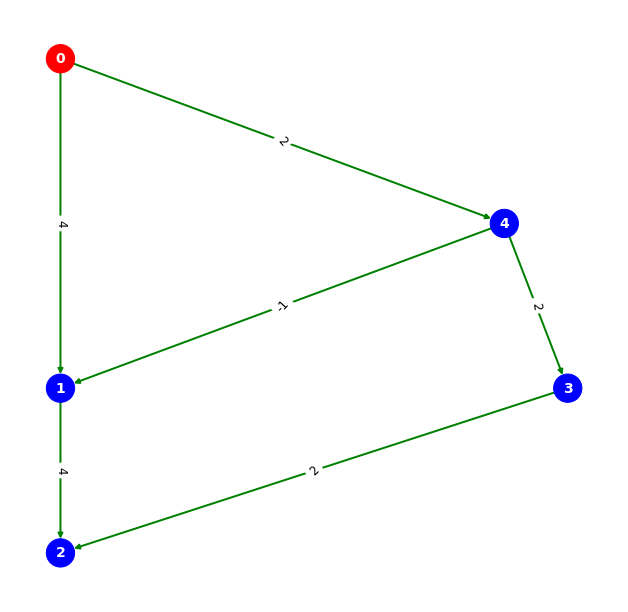

El vertice de origen es : 0
Calculando caminos mas cortos ...

Valores base inicializados : [0, 1000000000, 1000000000, 1000000000, 1000000000]

--------------------------------------------------------------------------------
-----Resolviendo problemas de tamaño 1, con 1 arcos disponibles-----
---> Reolviendo para problemas de 1 arcos y con vertice 0 de llegada

Valor para caso 1, 0 arcos para llegar al vertice 0 : 0
Valor para caso 2, 1 arcos para llegar al vertice 0 y con w = -1: 1000000000

El primer caso es el camino optimo y el resultado para el problema de tamaño i = 1 y v = 0

--------------------------------------------------------------------------------
---> Reolviendo para problemas de 1 arcos y con vertice 1 de llegada

Valor para caso 1, 0 arcos para llegar al vertice 1 : 1000000000
Valor para caso 2, 1 arcos para llegar al vertice 1 y con w = 0: 4

El segundo caso es el camino optimo y el resultado para el problema de tamaño i = 1 y v = 1

Las soluciones a los subproblema

In [17]:
# Ejemplo
G = graph_to_nxdigraph([(0,1,4), (0,4,2), (1,2,4), (4,1,-1), (4,3,2), (3,2,2)], 5)

lista = bellman_ford(G, 0, 9, visualize = True, verbose = True)

## 3. **Propiedades del algoritmo**




### 3.1 ***Tiempo de ejecución***
A continuación se analizan los tiempos de ejecució para los algoritmos *Dijkstra* y *Bellman-Ford*

####**`Bellman-Ford`**

#### *Teorema:*  
Para algún grafo de entrada $G = (V,E)$ con $n$ certices y $m$ arcos con valores $\in ℝ$ y un vértice de origen $s$, el algoritmo de `Bellman-Ford` tiene un tiempo de ejecución de $O(|V|\cdot |E|)$

#### *Prueba*

El algoritmo resuelve $n^2$ problemas distintos, donde $n$ es el número de vértices. Si el algoritmo realizara una cantidad constante de trabajo por subproblema, el tiempo de ejecución de este sería $O(n^2)$. Sin embargo, un subproblema tiene un número limitado de candidatos como respuesta.

Se puede definir la cantidad de candidatos para un subproblema como $1 + indeg(v)$ según la fórmula entregada por la función de recurrencia, donde $indeg(v)$ corresponde a la cantidad de arcos que llegan a $v$. 

Para alguna iteración de $i$ tenemos que el trabajo total por cualquier operación realizada por el loop interior es proporcional a:

<center>

$\sum_{v\in V} (1 + indeg(v)) = n + \sum_{v \in V}(indeg(v))$

</center>

Se observa que todos los arcos que llegan a un vértice $v$ para todo $v \in V$ corresponde a todos los arcos del grafo, es decir, $m$.

<center>

$\sum_{v\in V} (1 + indeg(v)) = n + m$

</center>

Por lo tanto, el trabajo realizado por cada loop interno es $O(n+m) = O(m)$, asumiendo que $m ≥ n$

Considerando que el loop exterior de $i$ realiza $n$ iteraciones y el loop interior $m$, tenemos un tiempo de ejecución de $O(n \cdot m)$ <br><br>

*`Dijkstra`*

Tiempo requerido para visitar todos los vertices : $O(V+E)$

Tiempo requerido para proesar un vertice : $O(log V)$

Tiempo requerido para todo el proceso : $O((V+E)log{V})$

























### 3.2 ***Correctitud del algoritmo***

Se puede probar la correctitud del algoritmo por inducción:

#### **Hipótesis**

Sabiendo que $i$ delimita el tamaño del problema, luego de la $i-ésima$ iteración tenemos que:

1. Si la distancia $L_{s,v}$ no es $+∞$, corresponde al largo de algún camino de $s →v$
2. Si existe un camino $s → v$ con $i$ arcos a lo más, entonces la distancia $L_{s,v}$ es a lo más el menor camino de $L_{s,v}$ con a lo más $i$ vértices 


#### **Prueba**

*Caso base* : 
> Para $i = 0$, la distancia $L_{s,s} = 0$, lo cual es correcto. Para cualquier otra distancia $L_{s,v} = + \infty$, lo que también es correcto pues no hay camino $L_{s,v}$ con 0 arcos.

*Paso inductivo* :
> Supongamos que para todo vértice $w$ con $L_{s,w}$ como camino mínimo de $s → w$ usa a lo más $i - 1$ arcos.
>
> Si $v \neq s$, sea $P$ el camino más corto de $s → v$ con a lo más $i$ arcos,  sea $w$ un vértice justo antes de $v$ en $P$ y $P'$ el camino $s → w$
>
> Por hipotésis inductiva, el valor $L_{P'}$ del camino $P'$ es $L_{i-1, w}$
>
> En la $i-ésima$ iteración se actualiza $L_{i, v} = min(L_{i-1,v}, L_{i-1,w} + l_{w,v})$. Se sabe que $L_{i-1,w} + l_{w,v} = L_{P'} + l_{w,v} = L_P$, lo que muestra que $L_{i,v} ≤ L_P$. Además, $L_{i-1,v}$ es el largo del camino más corto de $s →v$ con a lo más $i-1$ arcos, lo que debe ser al menos tan largo como $L_P$ ya que $P$ tiene más arcos que considerar
>
> El primer caso $L_{i, v} = L_{i-1, v}$ implica que la solución al problema anterior de menor tamaño es un candidato a solución. Este valor puede ser un valor real o bien, en caso de que no exista este camino $L_{i-1, v}$, $=∞$
>
> El segundo caso calcula $L_{i-1,w} + l_{w,v}$ que corresponde al largo de $P'$ más un último arco que conecte a $w$ con el vértice destino $v$. Este valor también puede tomar un real o $+∞$ en caso del que tampoco exista este camino.
>
>  Por inducción, estos cálculos de valores anteriores son realizados correctamente. $L_{i,v}$, dependiente en los resultados de los subproblemas de menor tamaño también será calculado de forma correcta.
>
> Si alguno de estos caminos existen, el mínimo de estos casos corresponderá a $L_{i,v} = P$, que es el camino mínimo de $s → v$ que utiliza a lo más $i$ arcos.
>
> Cuando $i = n$ siendo $n$ la cantidad de vértices dentro del grafo, si $L_{n-1,v} = L_{n,v}$ *(estable)* se habrán calculado todos los caminos mínimos de forma correcta, retornando la lista de todos los largos correspondientes
>
> En el caso contrario, si  $L_{n-1,v} \neq L_{n,v}$ entnces se ha detectado un ciclo negativo, retornando el mensaje correspondiente.
>
> Por lo tanto, el algoritmo de `Bellman-Ford` es correcto













